In [225]:
# 我们来实现拟合y = x*x，前0.75比例数据用于训练，剩下用于测试，适当加入噪声
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [226]:
#x = np.linspace(0,math.pi*8,2000)

x = np.linspace(-5, 5, 100)

In [227]:
noise = np.random.uniform(-5,5,len(x))

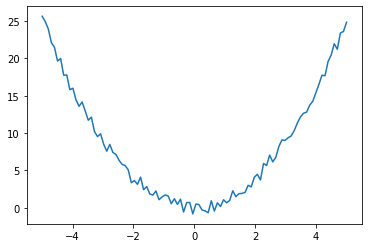

In [228]:
#y = np.sin(x)
y = pow(x,2)+0.2*noise
plt.plot(x,y)

In [229]:
#利用前3个波浪线来预测第4个波浪线
#特征就是前5日的数值
# train = []
# label = []
# for i in range(len(y)-5):
#     train.append(y[i:i+5])
#     label.append(y[i+5])
# train = np.array(train)
# label = np.array(label)

In [230]:
train = x 
label = y

In [231]:
p = 0.75
X_train = train[:int(len(train)*p)]
y_train = label[:int(len(train)*p)]
X_test = train[int(len(train)*p):]
y_test = label[int(len(train)*p):]

In [232]:
# plt.plot(range(len(y_train)), y_train)

In [233]:
class Net_R(nn.Module):
    def __init__(self):
        super(Net_R, self).__init__()
        self.hidden = nn.Linear(1, 10)
        self.pre = nn.Linear(10, 1)
 
    def forward(self, x):
        x = self.hidden(x)
        x = torch.relu(x)
        x = self.pre(x)
        return x

In [234]:
NN_net = nn.Sequential(
    nn.Linear(1, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

In [235]:
# net = Net_R()

In [236]:
net = NN_net

In [237]:
criterion=nn.MSELoss() # 使用CrossEntropyLoss损失
optm=torch.optim.Adam(net.parameters(), lr=0.1) # Adam优化
epochs=200 # 训练1000次

In [238]:
feature_dims = 1

In [239]:
x=torch.from_numpy(X_train).float().reshape(-1,feature_dims)
# x =x.reshape(-1,1) #在只有一个特征维度的时候，必须加上这句话，否则会报错
# print(x.shape)
y=torch.from_numpy(y_train).float().reshape(-1,1)

In [240]:

for i in range(epochs):
    # 指定模型为训练模式，计算梯度
    net.train()
    # 输入值都需要转化成torch的Tensor
    
    y_hat=net(x)
    loss=criterion(y_hat,y) # 计算损失
    optm.zero_grad() # 前一步的损失清零
    loss.backward() # 反向传播
    optm.step() # 优化
    if (i+1)%1 ==0 : # 这里我们每100次输出相关的信息
        # 指定模型为计算模式
        net.eval()
        test_in=torch.from_numpy(X_test).float()
        test_in = test_in.reshape(-1,feature_dims)
        test_l=torch.from_numpy(y_test).float()
        test_l = test_l.reshape(-1,1)
        test_out=net(test_in)
        #print("test_out:",test_out,test_out.shape)
        #print(test_out.max(-1)[0])
        # 使用我们的测试函数计算准确率
        accu=criterion(test_out,test_l)
        print("Epoch:{},Loss:{:.4f},Test loss：{:.2f}".format(i+1,loss.item(),accu))

Epoch:1,Loss:84.0262,Test loss：213.62
Epoch:2,Loss:63.1882,Test loss：182.45
Epoch:3,Loss:43.9508,Test loss：155.06
Epoch:4,Loss:27.1151,Test loss：129.24
Epoch:5,Loss:14.8150,Test loss：105.87
Epoch:6,Loss:10.3255,Test loss：86.91
Epoch:7,Loss:14.6343,Test loss：73.82
Epoch:8,Loss:21.7492,Test loss：66.47
Epoch:9,Loss:24.2728,Test loss：64.19
Epoch:10,Loss:21.5226,Test loss：65.76
Epoch:11,Loss:16.3981,Test loss：69.91
Epoch:12,Loss:11.7035,Test loss：75.40
Epoch:13,Loss:8.9403,Test loss：80.80
Epoch:14,Loss:8.2724,Test loss：84.73
Epoch:15,Loss:8.8206,Test loss：86.81
Epoch:16,Loss:9.7004,Test loss：87.19
Epoch:17,Loss:10.2033,Test loss：85.77
Epoch:18,Loss:9.9765,Test loss：82.41
Epoch:19,Loss:9.0596,Test loss：77.17
Epoch:20,Loss:7.7795,Test loss：70.47
Epoch:21,Loss:6.6265,Test loss：62.92
Epoch:22,Loss:6.0754,Test loss：55.31
Epoch:23,Loss:6.2398,Test loss：48.36
Epoch:24,Loss:6.6351,Test loss：42.64
Epoch:25,Loss:6.6102,Test loss：38.53
Epoch:26,Loss:6.0380,Test loss：36.13
Epoch:27,Loss:5.2537,Test los

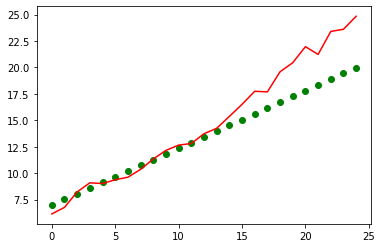

In [241]:
plt.plot(range(len(test_l)),test_l,"r")
plt.scatter(range(len(test_out.detach())),test_out.detach(),c="g")